In [1]:
import numpy as np
import pandas as pd


In [2]:
path = 'C:/Users/danyu/OneDrive/Desktop/Interview/take home challenge/'
df = pd.read_csv(path + 'sample_data.csv')
df.head()

,ts,user_id,country_id,site_id
0,2/1/2019 0:01,LC36FC,TL6,N0OTG
1,2/1/2019 0:10,LC39B6,TL6,N0OTG
2,2/1/2019 0:21,LC3500,TL6,N0OTG
3,2/1/2019 0:22,LC374F,TL6,N0OTG
4,2/1/2019 0:23,LCC1C3,TL6,QGO3G


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3553 entries, 0 to 3552
Data columns (total 4 columns):
ts            3553 non-null object
user_id       3553 non-null object
country_id    3553 non-null object
site_id       3553 non-null object
dtypes: object(4)
memory usage: 111.1+ KB


In [4]:
df.describe()

,ts,user_id,country_id,site_id
count,3553,3553,3553,3553
unique,2687,1916,7,8
top,2/2/2019 17:47,LC3A59,TL6,5NPAU
freq,9,149,1449,1614


In [5]:
df_bdv = df[df['country_id'] == 'BDV']
df_bdv.head()

,ts,user_id,country_id,site_id
13,2/1/2019 0:47,LC3C22,BDV,N0OTG
32,2/1/2019 2:46,LC375A,BDV,5NPAU
87,2/1/2019 6:44,LC392E,BDV,N0OTG
88,2/1/2019 7:36,LC3FAE,BDV,5NPAU
94,2/1/2019 8:58,LC3AFF,BDV,3POLC


In [6]:
df_bdv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844 entries, 13 to 3535
Data columns (total 4 columns):
ts            844 non-null object
user_id       844 non-null object
country_id    844 non-null object
site_id       844 non-null object
dtypes: object(4)
memory usage: 33.0+ KB


In [7]:
df_bdv_grp = df_bdv.groupby('site_id')
df_bdv_grp.user_id.describe()

,count,unique,top,freq
site_id,,,,
3POLC,5,2,LC34D4,4
5NPAU,717,544,LCC346,15
N0OTG,122,90,LC39C4,6


In [8]:
df['ts'] = pd.to_datetime(df['ts'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3553 entries, 0 to 3552
Data columns (total 4 columns):
ts            3553 non-null datetime64[ns]
user_id       3553 non-null object
country_id    3553 non-null object
site_id       3553 non-null object
dtypes: datetime64[ns](1), object(3)
memory usage: 111.1+ KB


In [9]:
df_ts = df[(df['ts'] > '2/3/2019 00:00')& (df['ts'] < '2/4/2019 23:59')]
df_ts = pd.DataFrame(df_ts.groupby(['user_id','site_id']).site_id.count())
df_ts.rename(columns = {'site_id':'count'}, inplace = True)
df_ts[df_ts['count'] > 10]

,,count
user_id,site_id,
LC06C3,N0OTG,25
LC3A59,N0OTG,26
LC3C7E,3POLC,15
LC3C9D,N0OTG,17


In [10]:
df_sort_ts = pd.DataFrame(df.groupby('user_id').ts.max()).reset_index()
df_sort_ts = df_sort_ts.merge(df, left_on = ['user_id','ts'], right_on = ['user_id','ts'], how = 'left')
df_sort_ts = df_sort_ts[['user_id','ts','site_id']]
df_sort_ts = pd.DataFrame(df_sort_ts.groupby('site_id').user_id.nunique()).reset_index()
df_sort_ts.sort_values(by = 'user_id', ascending = False)

,site_id,user_id
1,5NPAU,992
5,N0OTG,561
6,QGO3G,289
3,GVOFK,42
0,3POLC,28
7,RT9Z6,2
2,EUZ/Q,1
4,JSUUP,1


In [11]:
df_ts_max = pd.DataFrame(df.groupby('user_id').ts.max()).reset_index()
df_ts_max = df_ts_max.merge(df,left_on = ['user_id','ts'], right_on = ['user_id','ts'], how = 'left' )
df_ts_max = df_ts_max[['user_id','ts','site_id']]
df_ts_max.rename(columns = {'ts':'ts_last', 'site_id':'site_id_last'}, inplace = True)


In [12]:
df_ts_min = pd.DataFrame(df.groupby('user_id').ts.min()).reset_index()
df_ts_min = df_ts_min.merge(df,left_on = ['user_id','ts'], right_on = ['user_id','ts'], how = 'left' )
df_ts_min = df_ts_min[['user_id','ts','site_id']]
df_ts_min.rename(columns = {'ts':'ts_first','site_id':'site_id_first'}, inplace = True)


In [13]:
df_user = df_ts_max.merge(df_ts_min, left_on = 'user_id', right_on = 'user_id')
df_user = df_user[(df_user['site_id_last'] == df_user['site_id_first']) & (df_user['ts_last'] != df_user['ts_first'])]
df_user.user_id.nunique()

396

## Q2: Multivariate Linear Regression

In [14]:
import matplotlib.pyplot as plt

In [15]:
df_reg = pd.read_csv(path + 'sample_data_q2.csv', header = None)
df_reg.head()

,0,1,2
0,0.490,-0.18,11.50
1,-1.410,-1.23,11.80
2,0.943,4.51,-3.24
3,3.570,5.07,-23.90
4,-1.700,6.91,-22.10


In [16]:
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
0    300 non-null float64
1    300 non-null float64
2    300 non-null float64
dtypes: float64(3)
memory usage: 7.1 KB


In [17]:
df_reg = (df_reg - df_reg.mean())/df_reg.std()
df_reg.head()

,0,1,2
0,-0.320795,-0.731360,0.091294
1,-0.654407,-1.081514,0.091810
2,-0.241255,0.832661,0.065935
3,0.220006,1.019410,0.030391
4,-0.705326,1.633013,0.033488


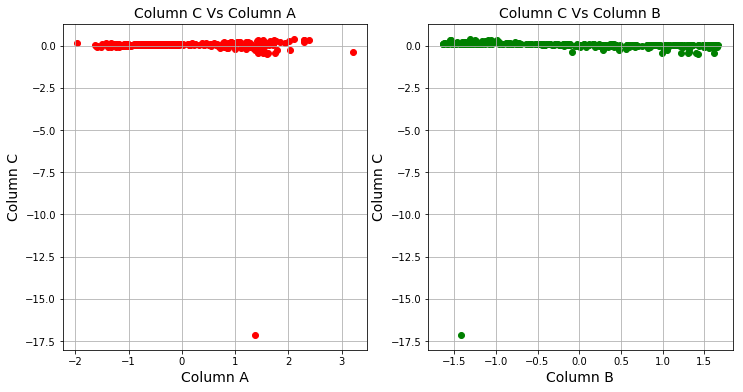

In [18]:
fig,axs = plt.subplots(ncols = 2, nrows = 1, figsize = (12,6))
axs[0].scatter(df_reg[0], df_reg[2], color='red')
axs[0].set_title('Column C Vs Column A', fontsize=14)
axs[0].set_xlabel('Column A', fontsize=14)
axs[0].set_ylabel('Column C', fontsize=14)
axs[0].grid(True)

axs[1].scatter(df_reg[1], df_reg[2], color='green')
axs[1].set_title('Column C Vs Column B', fontsize=14)
axs[1].set_xlabel('Column B', fontsize=14)
axs[1].set_ylabel('Column C', fontsize=14)
axs[1].grid(True)

plt.show()

In [19]:
df_etl = df_reg[df_reg[2] != df_reg[2].min()]

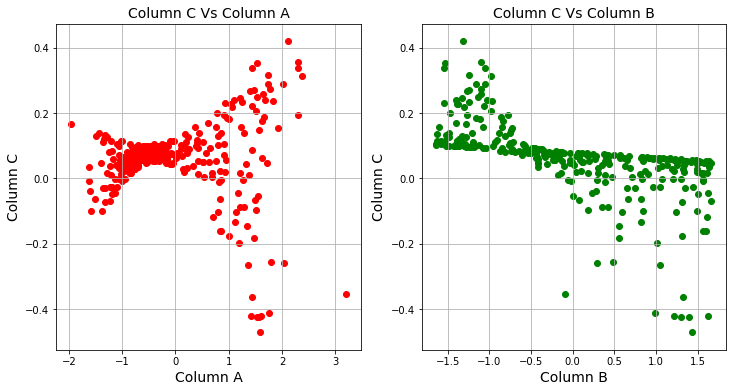

In [20]:
fig,axs = plt.subplots(ncols = 2, nrows = 1, figsize = (12,6))
axs[0].scatter(df_etl[0], df_etl[2], color='red')
axs[0].set_title('Column C Vs Column A', fontsize=14)
axs[0].set_xlabel('Column A', fontsize=14)
axs[0].set_ylabel('Column C', fontsize=14)
axs[0].grid(True)

axs[1].scatter(df_etl[1], df_etl[2], color='green')
axs[1].set_title('Column C Vs Column B', fontsize=14)
axs[1].set_xlabel('Column B', fontsize=14)
axs[1].set_ylabel('Column C', fontsize=14)
axs[1].grid(True)

plt.show()

In [21]:
X = df_etl.iloc[:,0:2]
ones = np.ones([X.shape[0], 1])
X = np.concatenate((ones,X),axis=1)

y = df_etl.iloc[:,2:3].values
theta = np.zeros([1,3])

alpha = 0.01
iters = 600

In [22]:
def computeCost(X,y,theta):
    to_summ = np.power(((X @ theta.T)-y),2)
    return np.sum(to_summ)/(2 * len(X))

In [23]:
def gradientDescent(X,y,theta,iters,alpha):
    cost = np.zeros(iters)
    for i in range(iters):
        theta = theta - (alpha/len(X)) * np.sum(X * (X @ theta.T - y), axis=0)
        cost[i] = computeCost(X, y, theta)
    
    return theta,cost


In [24]:
g,cost = gradientDescent(X,y,theta,iters,alpha)
print(g)

[[ 0.05746996 -0.01306591 -0.0781465 ]]


In [25]:
finalCost = computeCost(X,y,g)
print(finalCost)

0.004546744405102023


Text(0.5, 1.0, 'Error vs. Training Epoch')

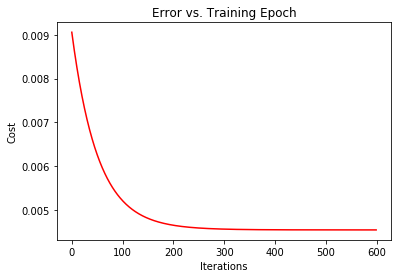

In [26]:
fig, ax = plt.subplots()  
ax.plot(np.arange(iters), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')  